In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Setup
os.chdir("..")
plt.style.use("ggplot")

%matplotlib inline

In [3]:
def separator(x):
    return x**2

def which_cluster(x):
    if x[1] < separator(x[0]):
        return -1
    else:
        return 1

In [4]:
n_train = 50
X_train = np.random.uniform(size=(n_train, 2))

y_train = np.array([
    which_cluster(X_train[k, :]) for k in range(n_train)
], dtype=np.int8)

In [5]:
t = np.linspace(0, 1, 100)
sep = separator(t)

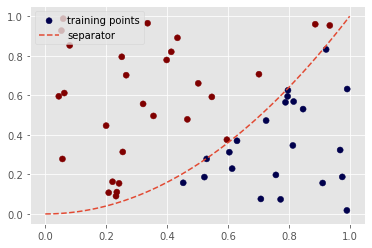

In [6]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='seismic', label="training points")
plt.plot(t, sep, '--', label='separator')
plt.legend()

In [7]:
from gp.models import GPBinaryClassifier
from gp.kernels import RBF
from gp.sigmoids import Logistic

In [8]:
ker = RBF(input_dim=2, l=1., sigma=1.)
logistic_func = Logistic()
gpc = GPBinaryClassifier(kernel_function=ker, sigmoid_function=logistic_func)

In [9]:
gpc.fit(X_train, y_train)
gpc._loglik

-35.06808745977239

In [10]:
q = 100
t = np.linspace(0, 1, q)
x, y = np.meshgrid(t, t)

proba = np.zeros((q, q))
for i in range(q):
    for j in range(q):
        point = np.array([x[i,j],y[i,j]])
        proba[i,j] = gpc.predict(point)

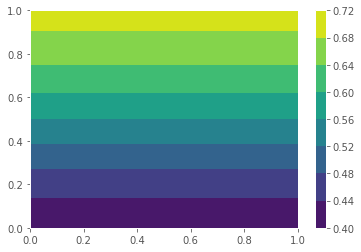

In [11]:
cb = plt.contourf(x, y, proba)
plt.colorbar(cb)

In [12]:
from sklearn.gaussian_process import GaussianProcessClassifier

In [13]:
gpc2 = GaussianProcessClassifier(optimizer=None).fit(X_train, y_train)

In [ ]:
proba = np.zeros((q, q))
for i in range(q):
    for j in range(q):
        point = np.array([x[i,j],y[i,j]])
        proba[i,j] = gpc.predict_proba(point)[0,1]